# Project Report- Rain in Australia ☔️
Group 11: Amy Xiong, Shaochen Zhang, Hussein Al Aaref, Ratana Wang
## Introduction

Rainfall prediction is based on the analysis of various weather variables. We will explore the prediction of next-day rainfall as a boolean using classification based on a subset of predictor variables. The dataset we will be analyzing, titled ‘Rain in Australia,’ summarizes different aspects of the weather (temperatures, wind speeds, etc.) for a decade, which were recorded by various Australian weather stations.

We thus formulate the question: <b> Will it rain tomorrow based on the current state of the weather and past weather data? </b> 

In [1]:
install.packages("leaps")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# load necessary packages
library(tidyverse)
library(tidymodels)
library(leaps)

# load data
url <- "https://drive.google.com/uc?export=download&id=1NKrFCoyZc8R1XoZ3Maz5AtSg5W4b2n9j"
rain <- read_csv(url)
glimpse(rain)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Rows: 145,460
Columns: 23
$ Date          <date> 2008-12-01, 2008-12-02, 2008-12-03, 2008-12-04, 2008-12…
$ Location      <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albur…
$ MinTemp       <dbl> 13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, 9.7, 13.1, …
$ MaxTemp       <dbl> 22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 30…
$ Rainfall      <dbl> 0.6, 0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, 2…
$ Evaporation   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Sunshine      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ WindGustDir   <chr> "W", "WNW", "WSW", "NE", "W", "WNW", "W", "W", "NNW", "W…
$ WindGustSpeed <dbl> 44, 44, 46, 24, 41, 56, 50, 35, 80, 28, 30, 31, 61, 44, …
$ WindDir9am    <chr> "W", "NNW", "W", "SE", "ENE", "W", "SW", "SSE", "SE", "S…
$ WindDir3pm    <chr> "WNW", "WSW", "WSW", "E", "NW", "W", "W", "W", "NW", "SS…
$ WindSpeed9am  <dbl> 20, 4, 19, 11, 7, 19, 20, 6, 7, 15, 17, 15, 28, 24, 4, N…
$ WindSpeed3pm

The dataset is already tidy. We see that `RainTomorrow` is of type character, with 'Yes' indicating that it will rain tomorrow and 'No' indicating otherwise. Since we will be working with `RainTomorrow` as a categorical variable, we will convert it to a factor. Also, we will remove any rows where `RainTomorrow` is `NA`, as those observations are useless for our purposes.

In [3]:
# convert the character RainTomorrow variable to the factor data type
rain <- rain |>
    mutate(RainTomorrow = as_factor(RainTomorrow)) |>
    filter(!is.na(RainTomorrow))
glimpse(rain)

Rows: 142,193
Columns: 23
$ Date          <date> 2008-12-01, 2008-12-02, 2008-12-03, 2008-12-04, 2008-12…
$ Location      <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albur…
$ MinTemp       <dbl> 13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, 9.7, 13.1, …
$ MaxTemp       <dbl> 22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 30…
$ Rainfall      <dbl> 0.6, 0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, 2…
$ Evaporation   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Sunshine      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ WindGustDir   <chr> "W", "WNW", "WSW", "NE", "W", "WNW", "W", "W", "NNW", "W…
$ WindGustSpeed <dbl> 44, 44, 46, 24, 41, 56, 50, 35, 80, 28, 30, 31, 61, 44, …
$ WindDir9am    <chr> "W", "NNW", "W", "SE", "ENE", "W", "SW", "SSE", "SE", "S…
$ WindDir3pm    <chr> "WNW", "WSW", "WSW", "E", "NW", "W", "W", "W", "NW", "SS…
$ WindSpeed9am  <dbl> 20, 4, 19, 11, 7, 19, 20, 6, 7, 15, 17, 15, 28, 24, NA, …
$ WindSpeed3pm

We focus on one arbitrarily chosen weather station location (Albury), as the entirety of Australia is too large of a region to analyze.

In [4]:
rain_albury <- rain |>
  filter(Location == "Albury") 
head(rain_albury)

Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No


## Preliminary Exploratory Data Analysis

#### Step 1. Picking the best subset of predictor variables

First, we pick the best subset of predictor variables, which we will use to build our classification model. The quantitative (i.e., possible predictor) variables are: \
`MinTemp` = minimum temperature (°C) \
`MaxTemp` = maximum temperature (°C) \
`Rainfall` = amount of rainfall (mm) \
`Evaporation` = Class A Evaporation Pan (mm) until 9am \
`Sunshine` = amount of sunshine (hours) \
`WindGustSpeed` = strongest wind gust speed (km/h) until 12am \
`WindSpeed9am` = average wind speed (km/hr) until 9am \
`WindSpeed3pm` = average wind speed (km/hr) until 3pm \
`Humidity9am` = humidity (%) at 9am \
`Humidity3pm` = humidity (%) at 3pm \
`Pressure9am` = mean sea level atmospheric pressure (hpa) at 9am \
`Pressure3pm` = mean sea level atmospheric pressure (hpa) at 3pm \
`Cloud9am` = cloud coverage (oktas) at 9am \
`Cloud3pm` = cloud coverage (oktas) at 3pm \
`Temp9am` = temperature (°C) at 9am \
`Temp3pm` = temperature (°C) at 3pm 

We will select only the useful columns; thus, we will remove the columns for which a large percentage of rows are `NA`.

In [5]:
# count the total number of rows in rain_albury
n <- nrow(rain_albury)
quantitative_vars <- rain_albury |>
    select(-Date, -Location, -WindGustDir, -WindDir9am, -WindDir3pm, -RainToday, -RainTomorrow)

quantitative_vars |>
    summarise_all(~ round(sum(is.na(.))/n, 3))

MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.002,0,0.007,1,1,0.003,0.001,0.002,0.001,0.001,0,0.001,0.574,0.53,0.001,0.001


We see that the `Evaporation` and `Sunshine` columns are *all* `NA`, and `Cloud9am` and `Cloud3pm` are mostly `NA`. Also, `MinTemp` and `MaxTemp` represent extrema (thus possibly outlier) values. We will remove all six of these from consideration. 

In [6]:
quantitative_vars <- quantitative_vars |>
    select(-Evaporation, -Sunshine, -Cloud9am, -Cloud3pm, -MinTemp, -MaxTemp)

Based on our research, we have concluded that pressure and temperature are important predictor variables for rainfall; we will definitely include `Pressure9am`, `Pressure3pm`, `Temp9am`, and `Temp3pm` (Barrira-Animas et al., 2022). We will remove them from our candidate pool. 

In [7]:
quantitative_vars <- quantitative_vars |>
    select(-Pressure9am, -Pressure3pm, -Temp9am, -Temp3pm)

We will perform forward selection on the remaining quantative variables to determine which ones are relevant for our prediction. The following code is based on the [code from the STHDA](http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/155-best-subsets-regression-essentials-in-r/), and uses the `regsubsets` function from the `leaps` library.

In [8]:
names <- colnames(quantitative_vars)
potential_predictors <- bind_cols(rain_albury |> select(RainTomorrow), quantitative_vars)

forward = regsubsets(RainTomorrow ~ ., data = potential_predictors, nvmax = length(names), method = "forward")
summary(forward)

Subset selection object
Call: regsubsets.formula(RainTomorrow ~ ., data = potential_predictors, 
    nvmax = length(names), method = "forward")
6 Variables  (and intercept)
              Forced in Forced out
Rainfall          FALSE      FALSE
WindGustSpeed     FALSE      FALSE
WindSpeed9am      FALSE      FALSE
WindSpeed3pm      FALSE      FALSE
Humidity9am       FALSE      FALSE
Humidity3pm       FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: forward
         Rainfall WindGustSpeed WindSpeed9am WindSpeed3pm Humidity9am
1  ( 1 ) " "      " "           " "          " "          " "        
2  ( 1 ) " "      "*"           " "          " "          " "        
3  ( 1 ) " "      "*"           " "          " "          "*"        
4  ( 1 ) " "      "*"           "*"          " "          "*"        
5  ( 1 ) "*"      "*"           "*"          " "          "*"        
6  ( 1 ) "*"      "*"           "*"          "*"          "*"        
         Humidity3pm
1  ( 1 ) "*

We will include two of these six potential variables in our final model, in addition to the four that we had previously chosen. Based on our forward selection results from above, it appears that the best two-variable model contains the predictors `WindGustSpeed` and `Humidity3pm`, so we will choose these. Our final training/testing set, `rain_set` is as follows:

In [9]:
rain_set <- rain_albury |>
    select(RainTomorrow, Pressure9am, Pressure3pm, Temp9am, Temp3pm, WindGustSpeed, Humidity3pm)
head(rain_set)

RainTomorrow,Pressure9am,Pressure3pm,Temp9am,Temp3pm,WindGustSpeed,Humidity3pm
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,1007.7,1007.1,16.9,21.8,44,22
No,1010.6,1007.8,17.2,24.3,44,25
No,1007.6,1008.7,21.0,23.2,46,30
No,1017.6,1012.8,18.1,26.5,24,16
No,1010.8,1006.0,17.8,29.7,41,33
No,1009.2,1005.4,20.6,28.9,56,23


#### Step 2. Summarizing the data

Now, we split `rain_set` such that 75% ends up in the training set, which is used to fit the model parameters, and the test set evaluates the best model. 

In [10]:
# set the seed
set.seed(1)

# split the data into a training and testing set
rain_split <- initial_split(rain_set, prop = 0.75, strata = RainTomorrow)
rain_train <- training(rain_split)
rain_test <- testing(rain_split)

From `rain_train`, we will report the Yes/No counts for `RainTomorrow`.

In [11]:
yes_no_counts <- rain_train |>
    group_by(RainTomorrow) |>
    summarize(counts = n())
yes_no_counts

RainTomorrow,counts
<fct>,<int>
No,1794
Yes,463


Since the `initial_split` function splits the dataset in a way such that the training and testing subsets are equally proportioned, we can examine the training subset to find the accuracy of the majority classifier. 

In [12]:
maj_accuracy <- 1794 / (1794 + 463)
maj_accuracy

[1] 0.7948604

As we can see, the accuracy of the majority classifier is 79%. Thus, our objective is to construct a classifier that will yield a higher accuracy than this.

Then, we calculate the means of our predictor variables:

In [13]:
predictor_avg <- rain_train |>
    select(-RainTomorrow) |>
    summarise_all(~ mean(., na.rm = TRUE))
predictor_avg

Pressure9am,Pressure3pm,Temp9am,Temp3pm,WindGustSpeed,Humidity3pm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1018.303,1015.705,14.32853,21.33733,32.99733,47.69729


Finally, we will calculate how many rows have missing data:

In [14]:
sum(apply(rain_train, 1, anyNA))

[1] 12

#### Step 3. Visualizing the data

As a preliminary visualization, we will pick 2 of our predictor variables (Temperature and Pressure at 3pm) at random, as we are unable to plot 2-D graphs with more than 2 predictor variables. 

Warning message:
“Removed 4 rows containing missing values (geom_point).”


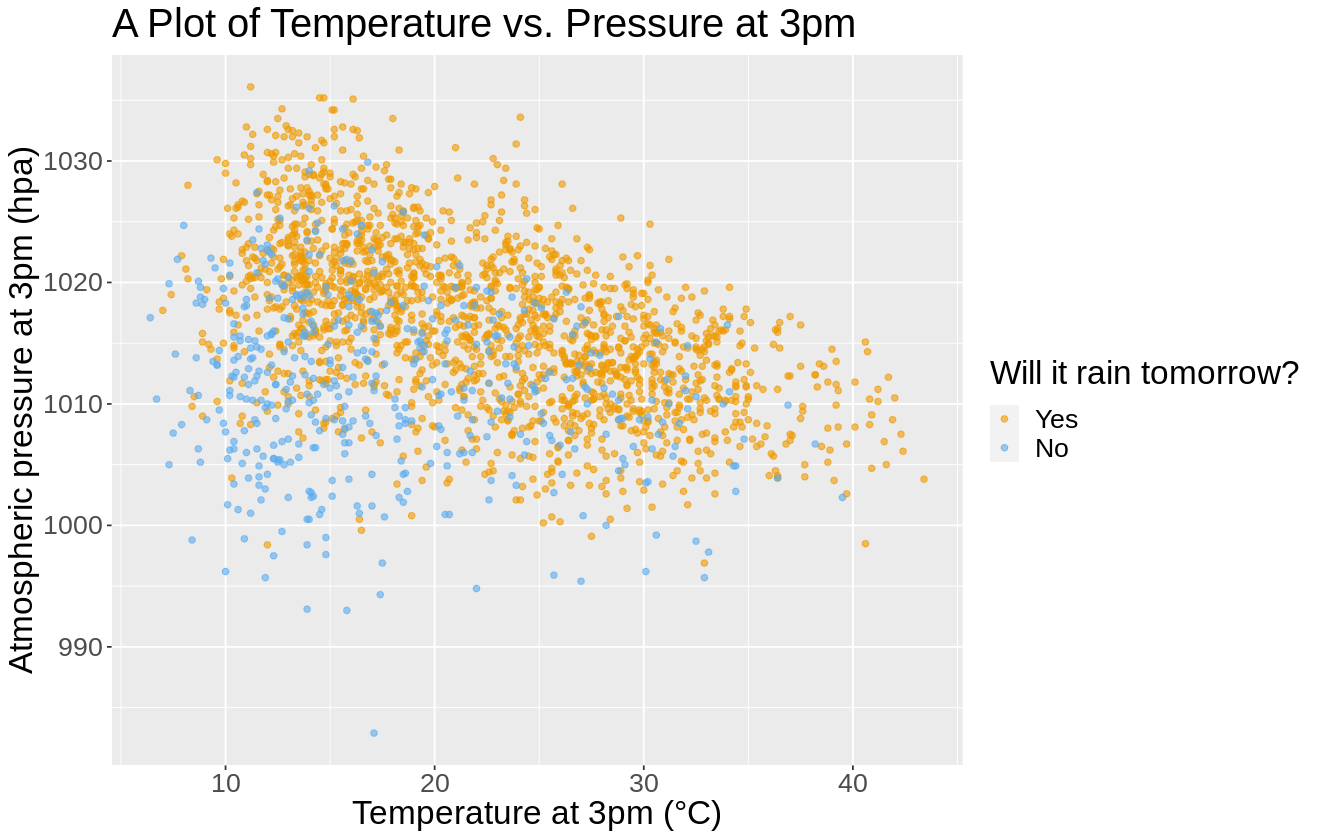

In [15]:
options(repr.plot.width = 11, repr.plot.height = 7)
# create scatter plot of temperature versus pressure,
# labeling the points be rain tomorrow class
rain_prelim <- rain_train |>
  ggplot(aes(x = Temp3pm, y = Pressure3pm, color = RainTomorrow)) +
  geom_point(alpha = 0.6) +
  labs(x = "Temperature at 3pm (°C)", 
       y = "Atmospheric pressure at 3pm (hpa)",
       color = "Will it rain tomorrow?") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 20)) +
  ggtitle("A Plot of Temperature vs. Pressure at 3pm")
rain_prelim

We can see that positive next-day rain observations typically fall in the upper right-hand side of our plot; negative next-day rain observations typically fall in the lower left-hand corner. In other words, at lower temperature and pressure, there tends to be no next-day rainfall, whereas higher temperature and pressure correlate with yes next-day rainfall. 

## Methods

To predict next-day rainfall in Albury, Australia, we have selected six predictor variables using external research and forward selection, and we will use the K-nearest neighbours classification model. 

To create a classification model with the highest possible accuracy, we will tune our value of `k` with cross-validation, visualize the accuracy of our potential models against different values of `k`, and choose the `k` for which accuracy is maximized. Then, we will find new observations and run them through our model, reporting whether it will rain the next day via a bar graph. We may choose to create additional models, using any 2 of the 6 predictor variables, and create plots (such as the one above) that visually indicate the results of the K-nearest neighbours algorithm. 

## Classification with K-nearest neighbors

#### Step 1: Preprocess the data

In [16]:
rain_recipe <- recipe(RainTomorrow ~ ., data = rain_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(rain_recipe) |>
  add_model(knn_spec) |>
  fit(data = rain_train)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, cancer_validation) |>
  bind_cols(cancer_validation)

# compute the accuracy
acc <- validation_predicted |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

#### Step 2: Train the classifier

Now that we can create a model specification

## Expected Outcomes and Significance

We expect to find the predicted classification (yes/no) for next-day rainfall in Albury, Australia. 

Despite its seeming triviality, rainfall prediction is critical, especially for a city like Vancouver. Weather forecasts answer important life-saving questions—Should an aircraft depart? Should one go hiking in the mountains?—but also whether one should bring an umbrella or get soaked.

For the future, we may want to ask: 
- Are there more significant predictor variables that we haven't considered?
- Can we extend our analysis to not only classify rainfall, but also quantify it via regression? 

## Sources

Barrera-Animas, A. Y., Oyedele, L., & Bilal, M. (2021, November 11). Rainfall prediction: A comparative analysis of modern machine learning algorithms for time-series forecasting. Retrieved March 11, 2023, from https://www.sciencedirect.com/science/article/pii/S266682702100102X#:~:text=Rainfall%20forecasting%20has%20been%20around,wind%20speed%2C%20and%20humidity 

Bureau of Meteorology. (2023). *Climate Data Online*. Climate Data Online - Map search. Retrieved March 11, 2023, from http://www.bom.gov.au/climate/data/ 

Bureau of Meteorology. (2023). *Daily weather observations*. Daily weather observations. Retrieved March 11, 2023, from http://www.bom.gov.au/climate/dwo/ 

Kassambara. (2018, March 11). *Best subsets regression essentials in R*. STHDA. Retrieved March 11, 2023, from http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/155-best-subsets-regression-essentials-in-r/ 

Tiffany Timbers, T. C. (2022, September 24). *Data science*. Chapter 6 Classification II: evaluation & tuning. Retrieved March 11, 2023, from https://datasciencebook.ca/intro.html 